### Authors: Kubam Ivo , Jacobs Xavier
### Purpose: Algorithms For Big Data Project
### Date: 25/3/2021

# Eliminate points

**Algorithm 1(eliminate points-m):** <br>
    **Input:** p1,p2,... , pn' (in order) where n' is the number of points in the stream.<br> 
    **Output**: Skyline points S' <br>
    1. Let x = 24m. 
    2. **Pass 1:** For j : 1, 2, ..., x, let p'j be a point picked uniformly at random from the stream. <br>
    Let S be the set of such points.<br>
    **Pass 2**
    4. for i = 1, ..., n' do 
         * for any p'j, if pi dominates p'j then p'j:=pi
    6. end for 
    7. Let S'={p'1,p'2,...,p'x}.
    8. **Pass 3** 
            Delete from stream all points in S' and all points dominated by any point in S'.
    9. return S' 

In [1]:
# generate points
import random

def generate_points(n):
    data = [(random.randint(1,100),random.randint(1,100)) for x in range(n)] 
    print('Stream contains', len(data), 'data points')
    return data

#stream = generate_points(1000)



In [2]:
# Class for algorithm 1: Eliminate-points (m)
import random
import numpy as np
class Eliminate:
    
    """ Class to generate m skyline points from n stream data """
    def __init__(self, m):
        self._m = m
        self._x = self._m * 24

    
    #reservoir sampling

    def reservoir_sample(self, stream):
        """Receives the sample generated data points and does to a reservoir sampling to return selected points """
        k = int(24*self._m)
        if k <  len(stream):
            reservoir = [stream[i] for i in range(k)]
        else:
            reservoir = stream[:]

        for i in range(k,len(stream)):
            j = random.randint(1,i)
            if j < k:
                reservoir[j] = stream[i]
        print(len(reservoir), 'points have been sample from the main stream into the reservoir sample')
        return reservoir

    # dominant points

    def dominate(self, stream, reservoir_point):
        """ Reeceives the selected points from reservoir sampling and replace any if dominated by a point in the stream data """
        dominant_point = reservoir_point [:]
        n = 0
        for i in range(len(stream)):
            sampled_elem = random.choice(dominant_point)

            x1, y1 = sampled_elem
            x2, y2 = stream[i]

            if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                n += 1
                #print('Point', stream[i], 'dominates and replaces', sampled_elem)        
                dominant_point[dominant_point.index(sampled_elem)] = stream[i]
        print('There were ', n, ' replacement done between the main stream and reservoir sample')
        print('Preview of skyline points ')
        print(dominant_point[:10], '...')
        return dominant_point

    # Final pass
    def remove_point_stream(self, stream, skyline_points):
        """Delete from stream data all points dominated by points skyline points or points found in skyline points"""
        output_stream = []
        n = 0
        for point in stream:
            if point not in skyline_points:
                n +=1
                output_stream.append(point)

        n = 0
        for point in skyline_points:
            x2, y2 = point
        
            for elem in output_stream:
                x1, y1 = elem
                if (x2 >= x1 and y2 >= y1) and (x2 > x1 or y2 > y1):
                    output_stream.remove(elem)
                    n +=1
        print(n, 'points in the main stream were remove eihter because they were dominated or found in the skyline list')
        print(len(output_stream), ' points are left in the stream')
        return output_stream
    
    


### Lemma Two is proven as the number of points left in the stream is always at most the input stream size divided by 4 or atleast 3n/4 points are eliminated from the main stream

# Streaming RAND

Algorithm 2 (Streaming RAND): 
    1: Let n be the number of points in the input stream. 
    Let m' = 1. 
    2: while the input stream is not empty do: 
    3: let n' be the current number of points in the stream 
    4: Call eliminate points (m'log(nlogn))
    5: If more than n'/2 points are left in the stream, m' = 2 m'
    6: end while 
    Remark: In case the stream cannot be changed, we do not have to actually delete points from stream. 
    We only keep the skyline points found so far and consider only points in the stream that is not dominated by any found skyline points. 
        

In [3]:
import math
# Fixed stream size for Eliminate-points algorithm
m_prime = 1

for size in range(10000,100001,10000):
    stream = generate_points(size)
    n = len(stream)
    
    while n > 0:
        parameter = int(m_prime*math.log(n*math.log(n)))
        test = Eliminate(parameter)
        reservoir_pts = test.reservoir_sample(stream)
        sky_pts = test.dominate(stream,reservoir_pts)
        output_stream = test.remove_point_stream(stream,sky_pts)
        n_prime = len(output_stream)
        if n_prime > n/2:
            m_prime = 2*m_prime
            n = n_prime
        else:
            print(output_stream)
            print('Current value of m-prime is ',m_prime,"\n")
            break

Stream contains 10000 data points
264 points have been sample from the main stream into the reservoir sample
There were  445  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(44, 99), (78, 59), (90, 90), (32, 96), (97, 76), (90, 96), (98, 84), (99, 59), (91, 98), (99, 87)] ...
9596 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
[]
Current value of m-prime is  1 

Stream contains 20000 data points
288 points have been sample from the main stream into the reservoir sample
There were  579  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(94, 97), (100, 68), (97, 98), (97, 59), (83, 100), (88, 76), (98, 100), (85, 82), (99, 99), (93, 91)] ...
19368 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
[]
Current value of m-prime is  1 

Stre

### Proofs lemma 6: E.g with n = 10000, The probability that the algorithm repeats until m-prime ≥ 2m is at most 1/10000 = . This implies that, with probability (1 − 1/10000)=0.999, the stream will be empty before m-prime is increased again. 

# Fixed Window

In [4]:
import time
import math

In [5]:
# varying the stream size

for size in range(10000,100001,10000):
    stream = generate_points(size)
    w = int(0.01 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)


    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    print("\n")
    

Stream contains 10000 data points
100 points have been sample from the main stream into the reservoir sample
There were  205  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 93), (97, 96), (87, 96), (99, 87), (99, 82), (97, 100), (92, 93), (100, 82), (97, 99), (100, 100)] ...
9837 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream


Stream contains 20000 data points
200 points have been sample from the main stream into the reservoir sample
There were  480  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(35, 100), (98, 93), (99, 98), (94, 96), (100, 81), (94, 97), (88, 99), (100, 83), (100, 84), (99, 86)] ...
19554 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream


Stream contains 30000 data points
300 points have been sample from

# Naive Loop Algorithm

In [6]:
class naive_bloc_nested_loop_algorithm:
    def __init__(self,stream):
        self._stream = stream 
    def comparison(stream):
        outgoing_stream = stream[:]
        for point in stream:
            for other_point in stream:
                if ((point[0] >= other_point[0]) and (point[1] >= other_point[1])) and ((point[0] > other_point[0]) or (point[1] > other_point[1])) and other_point in outgoing_stream:
                    outgoing_stream.remove(other_point)
        return(outgoing_stream)

# Basic bloc nested loop algorithm

In [7]:
class basic_bloc_nested_loop_algorithm:
    def __init__(self,stream,window_size):
        self._stream = stream 
        self._window_size = window_size 
            
    def subdivide_stream_in_windows(window_size,stream):
        ingoing_stream=stream[:]
        list_of_lists = []
        number_of_windows = int((1/window_size)//1)
        if number_of_windows == 0:
            number_of_windows = 1
        for i in range(0,len(stream),number_of_windows):
            window_list = []
            for j in range(i,i+number_of_windows):
                window_list.append(stream[j])
            list_of_lists.append(window_list)
        return(list_of_lists)
    
    def list_dispatch(liste):
            list_length = len(liste)
            dominating = []
            incomparable = []
            n = 0
            while n<list_length:
            
                x1,y1 = liste[n]
                m = 0
                dominant = 0
                dominated = 0
                while (m < list_length) and (dominated == 0):
                    x2,y2 = liste[m]
                    if (x1<=x2) and (y1<=y2) and((x1<x2) or (y1<y2)):
                        dominated = 1
                        if liste[n] in dominating:
                            dominating.remove(liste[n])
                    elif (x1>=x2) and (y1>=y2) and((x1>x2) or (y1>y2)) and (liste[n] not in dominating):
                        dominating.append(liste[n])
                        dominant = 1
                    m += 1        
                    if (dominated == 0) and (dominant == 0) and (m==list_length):
                        incomparable.append(liste[n])
                n += 1
            
            for dominating_point in dominating:
                if dominating_point in incomparable:
                    incomparable.remove(dominating_point)
            return(dominating,incomparable)
        
    def dispatch_of_list_dispatch(list_of_lists):
        dominating = []
        non_dominated = []
        for liste in list_of_lists:
            for component in non_dominated:
                if component not in liste:
                    liste.append(component)
            elements = basic_bloc_nested_loop_algorithm.list_dispatch(liste)
            for dominating_point in elements[0]:
                dominating.append(dominating_point)
            for non_dominated_point in elements[1]:
                non_dominated.append(non_dominated_point)
        
        return(dominating,non_dominated)

# Graphs 
## Calculations

In [8]:
# Eliminate points algorithm
exec_time_1 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    tic = time.perf_counter()
    m = 2
    test = Eliminate(m)
    reservoir_pts = test.reservoir_sample(stream)
    sky_pts = test.dominate(stream,reservoir_pts)
    output_stream = test.remove_point_stream(stream,sky_pts)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_1.append(toc - tic)
    print("\n")

Stream contains 10000 data points
48 points have been sample from the main stream into the reservoir sample
There were  131  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(88, 98), (99, 77), (100, 98), (97, 99), (99, 85), (74, 99), (99, 93), (100, 100), (80, 98), (97, 89)] ...
9916 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
Execution time:  0.440620674999991


Stream contains 20000 data points
48 points have been sample from the main stream into the reservoir sample
There were  137  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(83, 99), (100, 100), (95, 99), (95, 94), (99, 83), (100, 90), (98, 100), (88, 99), (100, 99), (99, 66)] ...
19894 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
Execution time:  1.558222695999973



In [9]:
# 1% basic bloc nested loop algorithm
exec_time_2 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    tic = time.perf_counter()
    list_of_lists = (basic_bloc_nested_loop_algorithm.subdivide_stream_in_windows(0.01,stream))
    lists = basic_bloc_nested_loop_algorithm.dispatch_of_list_dispatch(list_of_lists)
    print(len(lists[0]),len(lists[1]))
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_2.append(toc - tic)
    print("\n")

Stream contains 10000 data points
450 4
Execution time:  0.0574098010000057


Stream contains 20000 data points
888 10
Execution time:  0.11115897100000893


Stream contains 30000 data points
1394 41
Execution time:  0.1458798460000139


Stream contains 40000 data points
1838 51
Execution time:  0.21391891000001806


Stream contains 50000 data points
2296 100
Execution time:  0.2642398820000267


Stream contains 60000 data points
2588 22
Execution time:  0.2682873889999655


Stream contains 70000 data points
3180 127
Execution time:  0.3970784229999822


Stream contains 80000 data points
3597 89
Execution time:  0.4127566649999608


Stream contains 90000 data points
4141 119
Execution time:  0.5016322639999657


Stream contains 100000 data points
4649 83
Execution time:  0.5392293940000172




In [10]:
#  1% fixed window algorithm

exec_time_3 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    w = int(0.01 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_3.append(toc - tic)
    print("\n")
    

Stream contains 10000 data points
100 points have been sample from the main stream into the reservoir sample
There were  228  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(99, 98), (93, 97), (93, 82), (95, 55), (99, 91), (94, 93), (100, 85), (94, 95), (92, 96), (93, 96)] ...
9840 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  0  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(98, 100)] ...
0 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
Execution time:  0.43827300999998897


Stream contains 20000 data points
200 points have been sample from the main stream into the reservoir sample
There were  433  replacement done between the main stream and

In [11]:
# 0.1% basic bloc nested loop algorithm 
exec_time_4 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    tic = time.perf_counter()
    list_of_lists = (basic_bloc_nested_loop_algorithm.subdivide_stream_in_windows(0.001,stream))
    lists = basic_bloc_nested_loop_algorithm.dispatch_of_list_dispatch(list_of_lists)
    print(len(lists[0]),len(lists[1]))
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_4.append(toc - tic)
    print("\n")

Stream contains 10000 data points
26 0
Execution time:  0.08237559999997757


Stream contains 20000 data points
70 0
Execution time:  0.15498860000002423


Stream contains 30000 data points
98 0
Execution time:  0.2343194659999881


Stream contains 40000 data points
130 0
Execution time:  0.27516471500007356


Stream contains 50000 data points
139 0
Execution time:  0.34780089900004896


Stream contains 60000 data points
182 0
Execution time:  0.4005804189999935


Stream contains 70000 data points
217 0
Execution time:  0.5198858210000026


Stream contains 80000 data points
251 0
Execution time:  0.5825782430000572


Stream contains 90000 data points
258 1
Execution time:  0.6129365680000092


Stream contains 100000 data points
309 0
Execution time:  0.6867688319999843




In [12]:
# 0.01% basic bloc nested loop algorithm 
exec_time_5 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    tic = time.perf_counter()
    list_of_lists = (basic_bloc_nested_loop_algorithm.subdivide_stream_in_windows(0.0001,stream))
    lists = basic_bloc_nested_loop_algorithm.dispatch_of_list_dispatch(list_of_lists)
    print(len(lists[0]),len(lists[1]))
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_5.append(toc - tic)
    print("\n")

Stream contains 10000 data points
2 0
Execution time:  0.11116133699999864


Stream contains 20000 data points
2 0
Execution time:  0.09746622300008312


Stream contains 30000 data points
4 1
Execution time:  0.25964829700001246


Stream contains 40000 data points
4 0
Execution time:  0.3806648029999451


Stream contains 50000 data points
6 0
Execution time:  0.3938631130000658


Stream contains 60000 data points
6 1
Execution time:  0.5058051690000411


Stream contains 70000 data points
10 2
Execution time:  0.6648834000000079


Stream contains 80000 data points
9 0
Execution time:  0.5914921329999743


Stream contains 90000 data points
9 2
Execution time:  0.8054001389999712


Stream contains 100000 data points
12 5
Execution time:  0.8897786139999653




In [13]:
# 0.1% fixed window algorithm

exec_time_6 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    w = int(0.001 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_6.append(toc - tic)
    print("\n")
    

Stream contains 10000 data points
10 points have been sample from the main stream into the reservoir sample
There were  38  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 100), (97, 100), (98, 99), (97, 97), (99, 98), (100, 90), (99, 93), (97, 100), (97, 100), (94, 99)] ...
9951 points in the main stream were remove eihter because they were dominated or found in the skyline list
32  points are left in the stream
10 points have been sample from the main stream into the reservoir sample
There were  6  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 96), (99, 73), (4, 100), (100, 32), (100, 96), (100, 61), (99, 54), (100, 99), (98, 92), (98, 94)] ...
21 points in the main stream were remove eihter because they were dominated or found in the skyline list
1  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  0  replacement done betw

In [14]:
# 0.01% fixed window algorithm

exec_time_7 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    w = int(0.0001 * len(stream)) # getting the number of points using window size of 0.01.
    output_stream = stream[:] # Assuming output and stream data at thesame at the beginning
    n = len(output_stream)

    tic = time.perf_counter()  # starts the timer
    # simple running the elimate algorithm with w/24
    while n > 0:
        test = Eliminate(w/24)
        reservoir_pts = test.reservoir_sample(output_stream)
        sky_pts = test.dominate(output_stream,reservoir_pts)
        output_stream = test.remove_point_stream(output_stream,sky_pts)
        n = len(output_stream)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_7.append(toc - tic)
    print("\n")
    

Stream contains 10000 data points
1 points have been sample from the main stream into the reservoir sample
There were  7  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(99, 100)] ...
4976 points in the main stream were remove eihter because they were dominated or found in the skyline list
5023  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  5  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 99)] ...
2500 points in the main stream were remove eihter because they were dominated or found in the skyline list
2522  points are left in the stream
1 points have been sample from the main stream into the reservoir sample
There were  3  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 96)] ...
1234 points in the main stream were remove eihter because they were dominated or found in the skyline

3 points have been sample from the main stream into the reservoir sample
There were  19  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 100), (99, 99), (99, 100)] ...
26163 points in the main stream were remove eihter because they were dominated or found in the skyline list
3829  points are left in the stream
3 points have been sample from the main stream into the reservoir sample
There were  12  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(99, 98), (98, 98), (100, 98)] ...
3257 points in the main stream were remove eihter because they were dominated or found in the skyline list
568  points are left in the stream
3 points have been sample from the main stream into the reservoir sample
There were  8  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 89), (99, 90), (100, 93)] ...
398 points in the main stream were remove eihter because they were dom

69428 points in the main stream were remove eihter because they were dominated or found in the skyline list
557  points are left in the stream
7 points have been sample from the main stream into the reservoir sample
There were  16  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 93), (100, 93), (88, 100), (99, 98), (100, 97), (95, 99), (100, 99)] ...
545 points in the main stream were remove eihter because they were dominated or found in the skyline list
5  points are left in the stream
5 points have been sample from the main stream into the reservoir sample
There were  1  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(100, 28), (11, 89), (38, 18), (61, 83), (38, 18)] ...
1 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
Execution time:  12.889446274999955


Stream contains 80000 data points
8 points have been

In [15]:
# naïve loop
# only done up to 50k points as there is no need to do more given the time it takes 
exec_time_8 = []
for size in range(10000,50001,10000):
    stream = generate_points(size)
    tic = time.perf_counter()
    dominants = (naive_bloc_nested_loop_algorithm.comparison(stream))
    print(dominants)
    toc = time.perf_counter()
    print("Execution time: ", toc - tic)
    exec_time_8.append(toc - tic)
    print("\n")

Stream contains 10000 data points
[(99, 100), (100, 99), (100, 99), (100, 99), (100, 99)]
Execution time:  29.532129908


Stream contains 20000 data points
[(100, 100), (100, 100)]
Execution time:  117.5724767270001


Stream contains 30000 data points
[(100, 100), (100, 100)]
Execution time:  412.4222541240001


Stream contains 40000 data points
[(100, 99), (100, 99), (99, 100), (99, 100), (99, 100)]
Execution time:  577.450773495


Stream contains 50000 data points
[(100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100)]
Execution time:  801.5215114979999




In [16]:
import math
# RAND algorithm
m_prime = 1
exec_time_9 = []
for size in range(10000,100001,10000):
    stream = generate_points(size)
    n = len(stream)
    tic = time.perf_counter()
    while n > 0:
        parameter = int(m_prime*math.log(n*math.log(n)))
        test = Eliminate(parameter)
        reservoir_pts = test.reservoir_sample(stream)
        sky_pts = test.dominate(stream,reservoir_pts)
        output_stream = test.remove_point_stream(stream,sky_pts)
        n_prime = len(output_stream)
        if n_prime > n/2:
            m_prime = 2*m_prime
            n = n_prime
        else:
            print(output_stream)
            print('Current value of m-prime is ',m_prime,"\n")
            break
        toc = time.perf_counter()
        print("Execution time: ", toc - tic)
        exec_time_1.append(toc - tic)
        print("\n")

Stream contains 10000 data points
264 points have been sample from the main stream into the reservoir sample
There were  448  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(73, 100), (91, 98), (58, 98), (100, 28), (94, 88), (100, 22), (95, 79), (72, 94), (95, 96), (96, 65)] ...
9586 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
[]
Current value of m-prime is  1 

Stream contains 20000 data points
288 points have been sample from the main stream into the reservoir sample
There were  599  replacement done between the main stream and reservoir sample
Preview of skyline points 
[(99, 89), (98, 70), (100, 31), (57, 97), (100, 99), (61, 100), (99, 100), (93, 100), (94, 78), (92, 99)] ...
19380 points in the main stream were remove eihter because they were dominated or found in the skyline list
0  points are left in the stream
[]
Current value of m-prime is  1 


# Graphs 
## Actual Graphs 

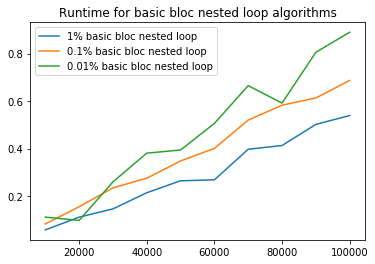

In [45]:
# the 3 basic bloc nested loop algorithms 
import matplotlib.pyplot as plt
n_list = []
for size in range(10000,100001,10000):
    n_list.append(size)

plt.plot(n_list,exec_time_2, label='1% basic bloc nested loop ')
plt.plot(n_list,exec_time_4, label='0.1% basic bloc nested loop')
plt.plot(n_list,exec_time_5, label='0.01% basic bloc nested loop')


plt.title("Runtime for basic bloc nested loop algorithms")
plt.legend()

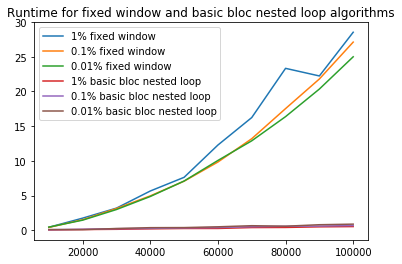

In [46]:
# basic bloc nested loop and fixed window algorithms with 1,0.1 and 0.01% windows 
import matplotlib.pyplot as plt
n_list = []
for size in range(10000,100001,10000):
    n_list.append(size)

plt.plot(n_list,exec_time_3, label='1% fixed window') # fixed window 1%
plt.plot(n_list,exec_time_6,label='0.1% fixed window') # fixed window 0.1%
plt.plot(n_list,exec_time_7,label='0.01% fixed window') # fixed window 0.01%
plt.plot(n_list,exec_time_2,label='1% basic bloc nested loop') # basic bloc nested loop 1% window 
plt.plot(n_list,exec_time_4, label='0.1% basic bloc nested loop') # basic bloc nested loop 0.1% window 
plt.plot(n_list,exec_time_5, label='0.01% basic bloc nested loop') # basic bloc nested loop 0.01% window
plt.title("Runtime for fixed window and basic bloc nested loop algorithms")
plt.legend()

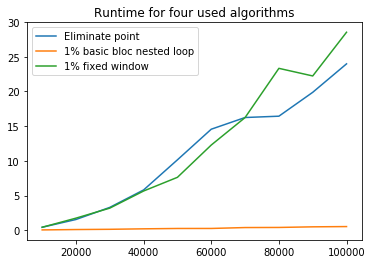

In [49]:
# summary of the main algorithms 
import matplotlib.pyplot as plt
n_list = []
for size in range(10000,100001,10000):
    n_list.append(size)

plt.plot(n_list,exec_time_1, label='Eliminate point') # Eliminate points 2 skyline points 
'''plt.plot(n_list,exec_time_9) # RAND Algorithm   '''
plt.plot(n_list,exec_time_2,label='1% basic bloc nested loop') # basic bloc nested loop 1% window 
plt.plot(n_list,exec_time_3, label='1% fixed window') # fixed window 1% 
'''plt.plot(n_list,exec_time_8) # naïve method '''
plt.title("Runtime for four used algorithms")
plt.legend()

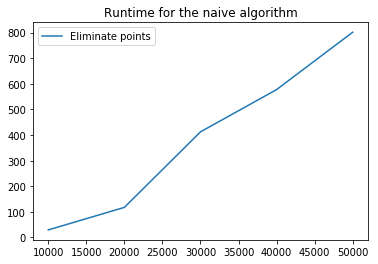

In [48]:
# summary of the main algorithms 
import matplotlib.pyplot as plt
n_list = []
for size in range(10000,50001,10000):
    n_list.append(size)

plt.plot(n_list,exec_time_8,label='Eliminate points') # naïve method 
plt.title("Runtime for the naive algorithm")
plt.legend()

The problem with the Basic Bloc Nested Loop is that it only compares small components with one another. 
Therefore, if the data is not entirely randomly distributed amongst the windows or if there is only a limited amount of skyline points we will not know anything about it. If there is any structure in the data that we are provided the skyline points estimation will be bad. 

The naïve algorithm illustrates what we come from, a slow algorithm with only a very few positive elements (the extreme cases)